# Drive & Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
import os
sys.path.append('/content/drive/MyDrive/Applied Analytics/')


#base_path = "/Users/kaihorlacher/Documents/HochschuleAalen/Semester2/03_Machine Learning Research (Data Science)/Applied-Analytics_Few-Shot-AD"
#data_path = base_path + "/data/mechanicalseals"

#base_path_gd = "/content/drive/MyDrive/03 HS Aalen/Applied-Analytics_Few-Shot-AD" # TODO: insert path to your project
#data_path_gd = base_path_gd + "/data/mechanicalseals"

base_path = "/content/drive/MyDrive/Applied Analytics/" # TODO: insert path to your project

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.applications.vgg16 import preprocess_input as pre_input_vgg16
from tensorflow.keras.applications.resnet50 import preprocess_input as pre_input_resnet50
from tensorflow.keras.applications.inception_v3 import preprocess_input as pre_input_inception_v3
from tensorflow.keras.applications.xception import preprocess_input as pre_input_xception
from sklearn.metrics import balanced_accuracy_score
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import copy
import cv2


# Metrices

In [ ]:
balanced_path = base_path + "Balanced/"
inbalanced_path = base_path + "Inbalanced/"

balanced_k5_path_metrices = balanced_path + "K5 Balanced/model_metrics_k5_balanced2023-06-17_13-18-07"
balanced_k10_path_metrices = balanced_path + "K10 Balanced/model_metrics_k10_balanced2023-06-17_13-25-27"
balanced_k20_path_metrices = balanced_path + "K20 Balanced/model_metrics_k20_balanced2023-06-17_13-42-46"


inbalanced_k5_path_metrices = inbalanced_path + "K5 Inbalanced/model_metrics_k5_balanced2023-06-17_14-25-12"
inbalanced_k10_path_metrices = inbalanced_path + "K10 Inbalanced/model_metrics_k10_balanced2023-06-17_14-51-03"
inbalanced_k20_path_metrices = inbalanced_path + "K20 Inbalanced/model_metrics_k20_balanced2023-06-17_15-17-52"

In [ ]:
df_k5_balanced = pd.read_csv(balanced_k5_path_metrices)
df_k10_balanced = pd.read_csv(balanced_k10_path_metrices)
df_k20_balanced = pd.read_csv(balanced_k20_path_metrices)

df_k5_inbalanced = pd.read_csv(inbalanced_k5_path_metrices)
df_k10_inbalanced = pd.read_csv(inbalanced_k10_path_metrices)
df_k20_inbalanced = pd.read_csv(inbalanced_k20_path_metrices)

In [ ]:
z_count_model_col = 4
i_values_rows = 8
value_list_k5_balanced = []
value_list_k10_balanced = []
value_list_k20_balanced = []
value_list_k5_inbalanced = []
value_list_k10_inbalanced = []
value_list_k20_inbalanced = []

list_of_shots = [df_k5_balanced, df_k10_balanced, df_k20_balanced, df_k5_inbalanced, df_k10_inbalanced, df_k20_inbalanced]

for each in list_of_shots:
  for z in range(z_count_model_col):
      scoring_metrics = {}
      scoring_metrics["Modelname"] = each.iloc[z, 0]
      scoring_metrics["Train Loss"] = round(eval(each.iloc[z, 1])[-1], 6)
      scoring_metrics["Train F1-Score"] = round(eval(each.iloc[z, 2])[-1], 6)
      scoring_metrics["VAL Loss"] = round(eval(each.iloc[z, 3])[-1], 6)
      scoring_metrics["VAL F1-Score"] = round(eval(each.iloc[z, 4])[-1], 6)
      scoring_metrics["AUC-ROC-VAL"] = round(eval(each.iloc[z, 5])[-1], 6)
      scoring_metrics["F1-Score Test"] = round(each.iloc[z, 6], 6)
      scoring_metrics["Test Loss"] = round(each.iloc[z, 7], 6)
      scoring_metrics["AUC-ROC Test"] = round(each.iloc[z, 8], 6)

      if each.equals(list_of_shots[0]):
        value_list_k5_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[1]):
        value_list_k10_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[2]):
        value_list_k20_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[3]):
        value_list_k5_inbalanced.append(scoring_metrics)
      if each.equals(list_of_shots[4]):
        value_list_k10_inbalanced.append(scoring_metrics)
      if each.equals(list_of_shots[5]):
        value_list_k20_inbalanced.append(scoring_metrics)

df_k5_balanced_lastvalues = pd.DataFrame(value_list_k5_balanced)
df_k10_balanced_lastvalues = pd.DataFrame(value_list_k10_balanced)
df_k20_balanced_lastvalues = pd.DataFrame(value_list_k20_balanced)

df_k5_inbalanced_lastvalues = pd.DataFrame(value_list_k5_inbalanced)
df_k10_inbalanced_lastvalues = pd.DataFrame(value_list_k10_inbalanced)
df_k20_inbalanced_lastvalues = pd.DataFrame(value_list_k20_inbalanced)

# Metrices Tables

In [ ]:
print("BALANCE K5-SHOT")
df_k5_balanced_lastvalues


BALANCE K5-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.033686,1.0,0.039037,1.0,1.0,0.833333,0.145011,0.972222
1,ResNet50,0.006956,1.0,0.007949,1.0,1.0,0.833333,0.164404,0.981667
2,InceptionV3,0.240511,1.0,0.240198,1.0,1.0,0.833333,0.286029,0.989444
3,Xception,0.009491,1.0,0.009264,1.0,1.0,0.833333,0.167243,0.958889


In [ ]:
print("BALANCE K10-SHOT")
df_k10_balanced_lastvalues


BALANCE K10-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.022782,1.0,0.024227,1.0,1.0,0.833333,0.144660,0.984444
1,ResNet50,0.004972,1.0,0.005940,1.0,1.0,0.833333,0.187203,0.952222
2,InceptionV3,0.650822,0.0,0.639576,0.0,1.0,0.000000,0.644977,0.976667
3,Xception,0.021341,1.0,0.018919,1.0,1.0,0.833333,0.146627,0.952222


In [ ]:
print("BALANCE K20-SHOT")
df_k20_balanced_lastvalues

BALANCE K20-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.284188,0.921569,0.145431,1.000000,1.0,0.833333,0.192570,0.970000
1,ResNet50,0.186690,0.921569,0.041407,1.000000,1.0,0.833333,0.129347,0.973333
2,InceptionV3,0.540664,0.921569,0.536440,0.666667,1.0,0.558824,0.552490,0.992222
3,Xception,0.287651,0.921569,0.117684,1.000000,1.0,0.833333,0.176438,0.960556


In [ ]:
print("INBALANCE K5-SHOT")
df_k5_inbalanced_lastvalues

INBALANCE K5-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.102856,1.0,0.110937,1.0,1.0,0.961538,0.186712,0.948125
1,ResNet50,0.010904,1.0,0.013461,1.0,1.0,0.961538,0.163216,0.956250
2,InceptionV3,0.379885,1.0,0.379223,1.0,1.0,0.961538,0.406582,0.985625
3,Xception,0.032265,1.0,0.038341,1.0,1.0,0.961538,0.159313,0.952500


In [ ]:
print("INBALANCE K10-SHOT")
df_k10_inbalanced_lastvalues

INBALANCE K10-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.042538,1.000000,0.044839,1.0,1.0,0.961538,0.152328,0.962500
1,ResNet50,0.003607,1.000000,0.003674,1.0,1.0,0.961538,0.193881,0.948750
2,InceptionV3,0.439981,0.798712,0.439962,0.8,1.0,0.772727,0.458804,0.993125
3,Xception,0.015576,1.000000,0.016518,1.0,1.0,0.961538,0.166447,0.941875


In [ ]:
print("INBALANCE K20-SHOT")
df_k20_inbalanced_lastvalues

INBALANCE K20-SHOT


,Modelname,Train Loss,Train F1-Score,VAL Loss,VAL F1-Score,AUC-ROC-VAL,F1-Score Test,Test Loss,AUC-ROC Test
0,VGG16,0.217976,0.949634,0.092719,1.000000,1.0,0.961538,0.157805,0.956250
1,ResNet50,0.193701,0.949634,0.065620,1.000000,1.0,0.961538,0.141605,0.950625
2,InceptionV3,0.482107,0.823260,0.400243,0.941176,1.0,0.944444,0.423118,0.978125
3,Xception,0.235015,0.949634,0.069702,1.000000,1.0,0.961538,0.146654,0.960000


# Diagramms Plots

In [ ]:
z_count_model_col = 4
i_values_rows = 8
all_value_list_k5_balanced = []
all_value_list_k10_balanced = []
all_value_list_k20_balanced = []
all_value_list_k5_inbalanced = []
all_value_list_k10_inbalanced = []
all_value_list_k20_inbalanced = []

list_of_shots = [df_k5_balanced, df_k10_balanced, df_k20_balanced, df_k5_inbalanced, df_k10_inbalanced, df_k20_inbalanced]

for each in list_of_shots:
  for z in range(z_count_model_col):
      scoring_metrics = {}
      scoring_metrics["Modelname"] = each.iloc[z, 0]
      scoring_metrics["Train Loss"] = eval(each.iloc[z, 1])
      scoring_metrics["Train F1-Score"] = eval(each.iloc[z, 2])
      scoring_metrics["VAL Loss"] = eval(each.iloc[z, 3])
      scoring_metrics["VAL F1-Score"] = eval(each.iloc[z, 4])
      scoring_metrics["AUC-ROC-VAL"] = eval(each.iloc[z, 5])
      scoring_metrics["F1-Score Test"] = each.iloc[z, 6]
      scoring_metrics["Test Loss"] = each.iloc[z, 7]
      scoring_metrics["AUC-ROC Test"] = each.iloc[z, 8]

      if each.equals(list_of_shots[0]):
        all_value_list_k5_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[1]):
        all_value_list_k10_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[2]):
        all_value_list_k20_balanced.append(scoring_metrics)
      if each.equals(list_of_shots[3]):
        all_value_list_k5_inbalanced.append(scoring_metrics)
      if each.equals(list_of_shots[4]):
        all_value_list_k10_inbalanced.append(scoring_metrics)
      if each.equals(list_of_shots[5]):
        all_value_list_k20_inbalanced.append(scoring_metrics)

df_k5_balanced_allvalues = pd.DataFrame(all_value_list_k5_balanced)
df_k10_balanced_allvalues = pd.DataFrame(all_value_list_k10_balanced)
df_k20_balanced_allvalues = pd.DataFrame(all_value_list_k20_balanced)

df_k5_inbalanced_allvalues = pd.DataFrame(all_value_list_k5_inbalanced)
df_k10_inbalanced_allvalues = pd.DataFrame(all_value_list_k10_inbalanced)
df_k20_inbalanced_allvalues = pd.DataFrame(all_value_list_k20_inbalanced)

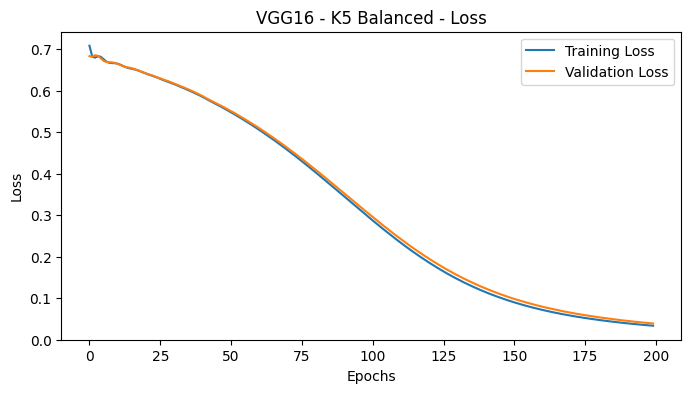

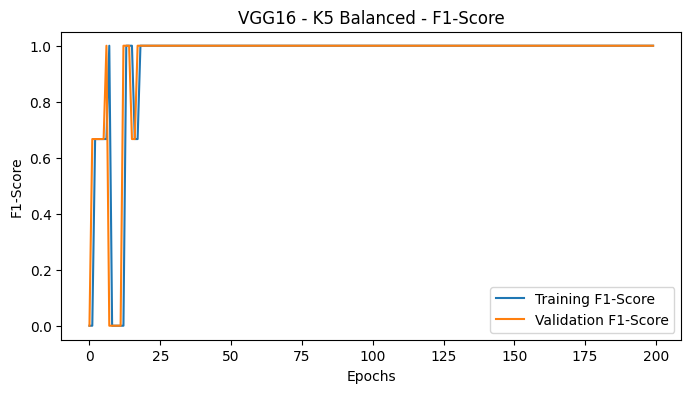

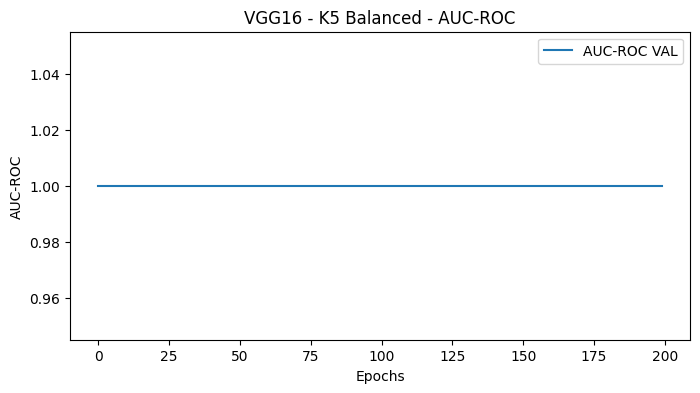

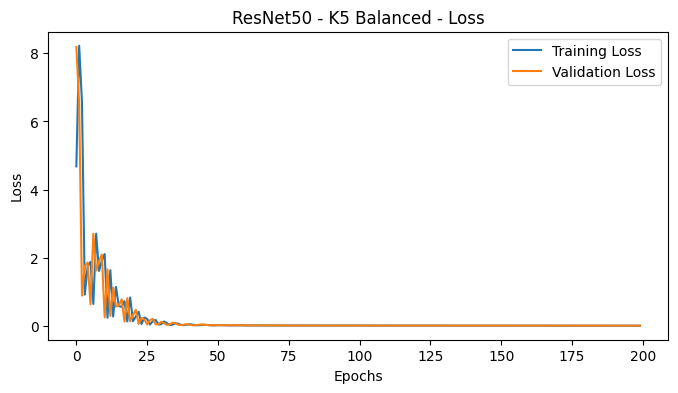

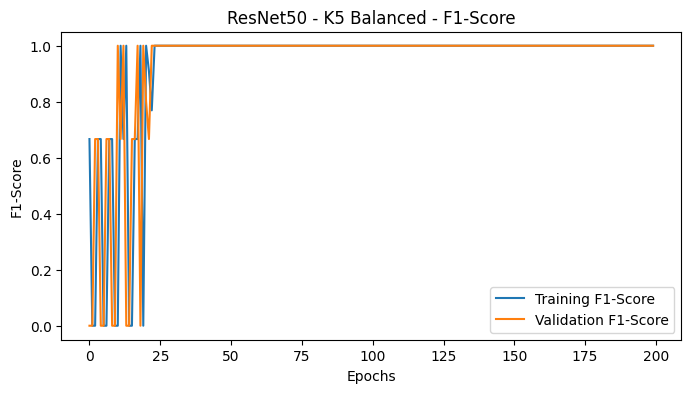

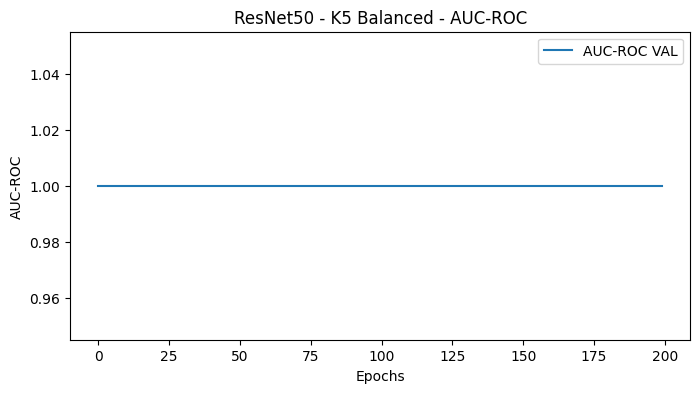

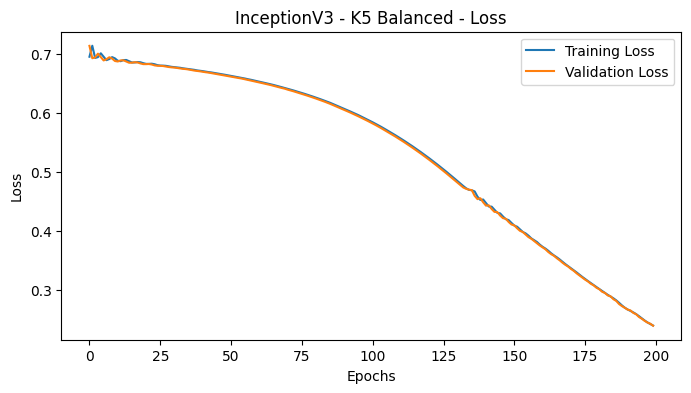

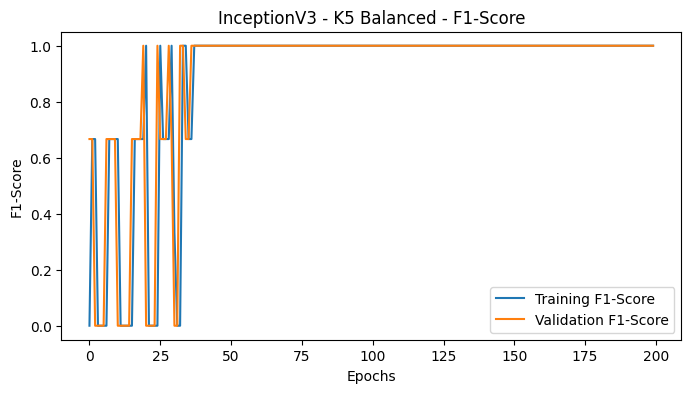

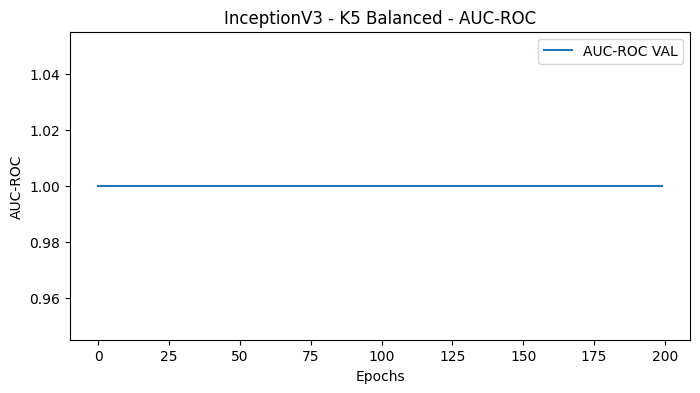

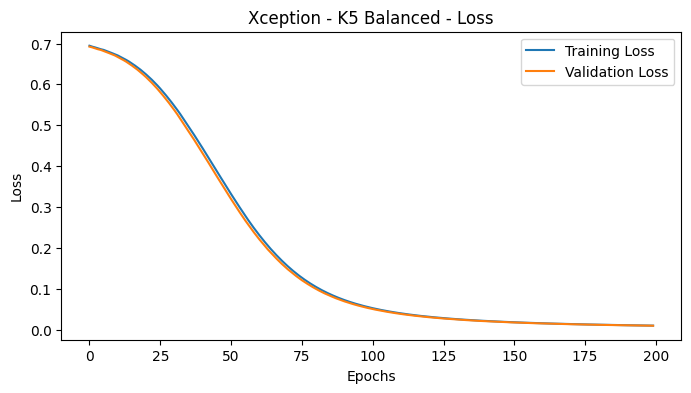

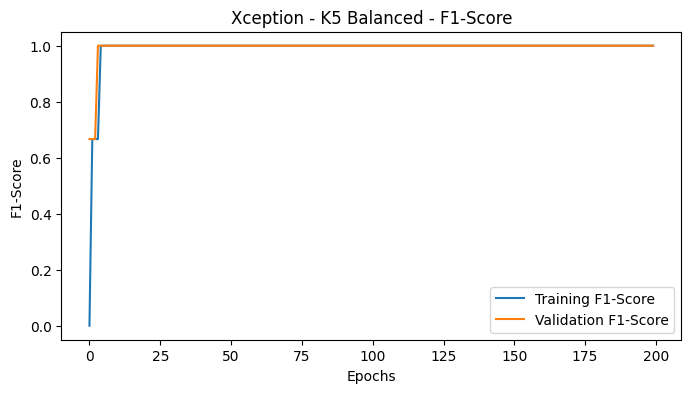

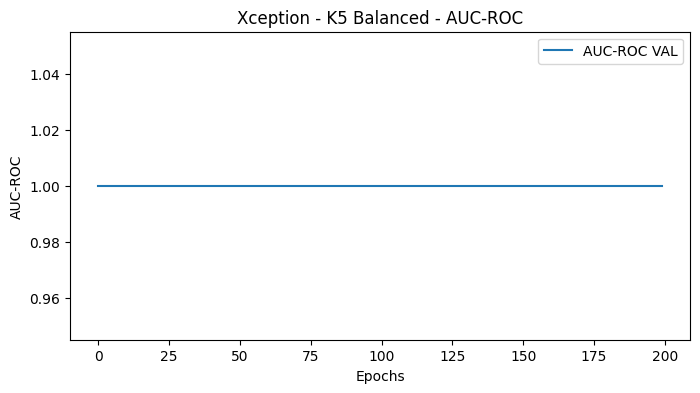

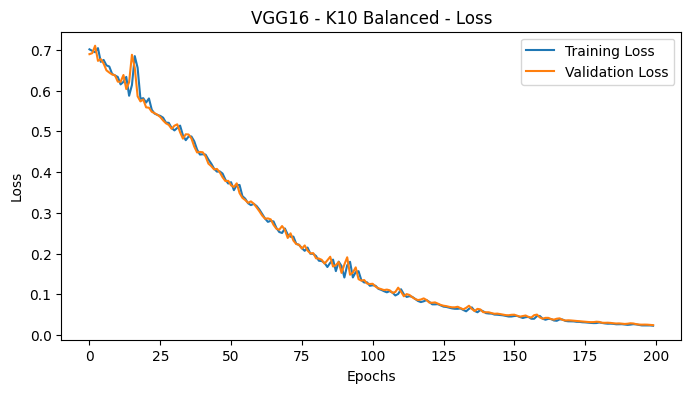

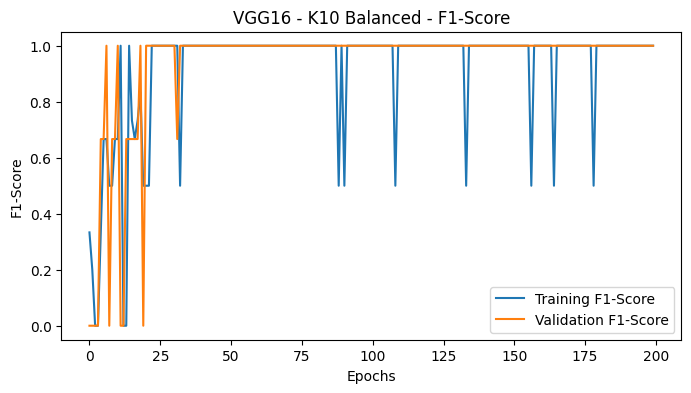

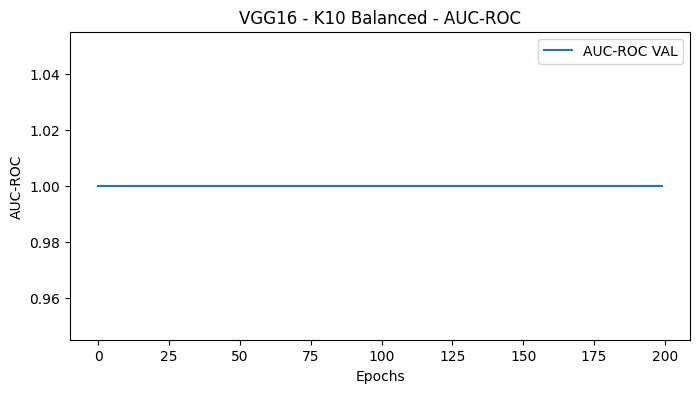

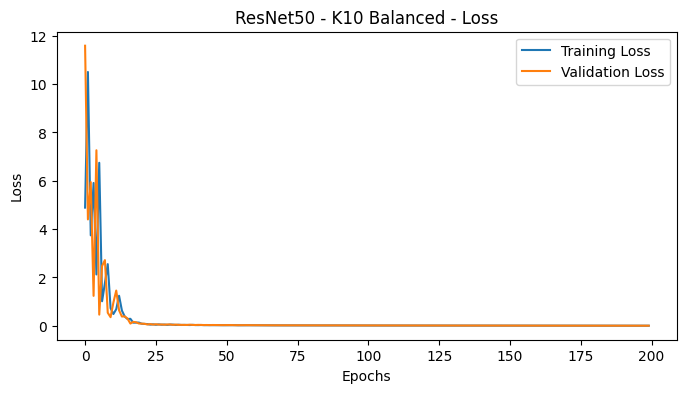

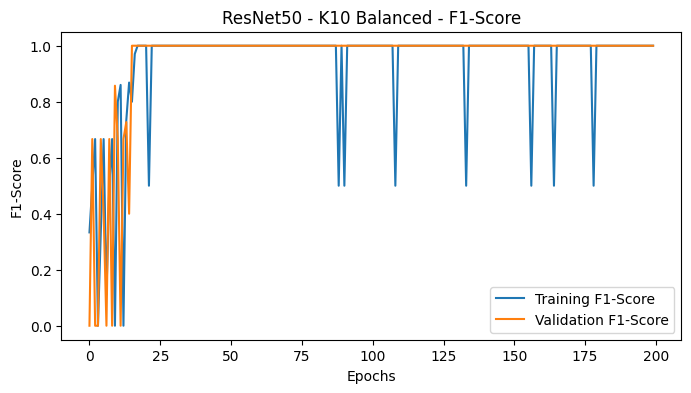

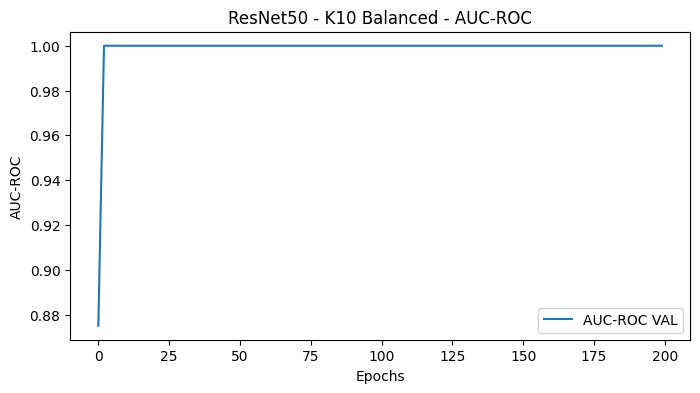

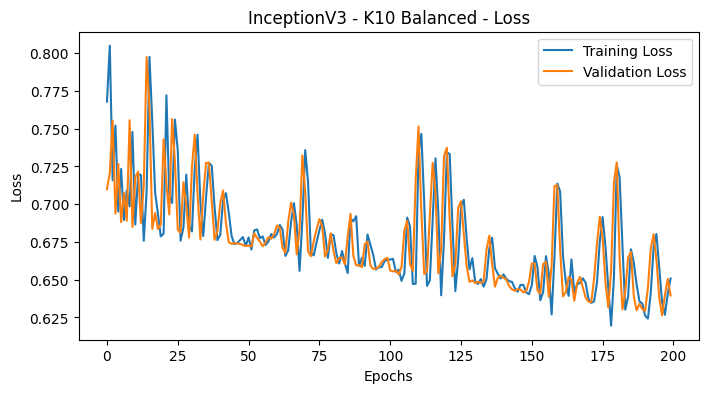

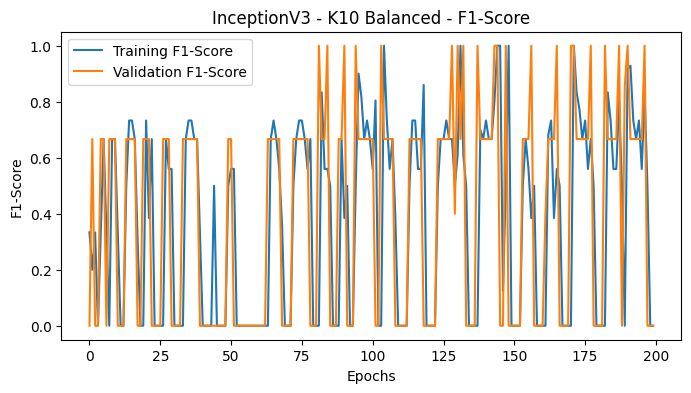

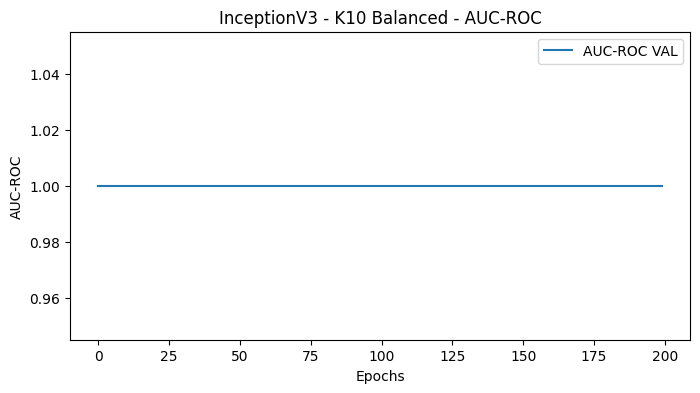

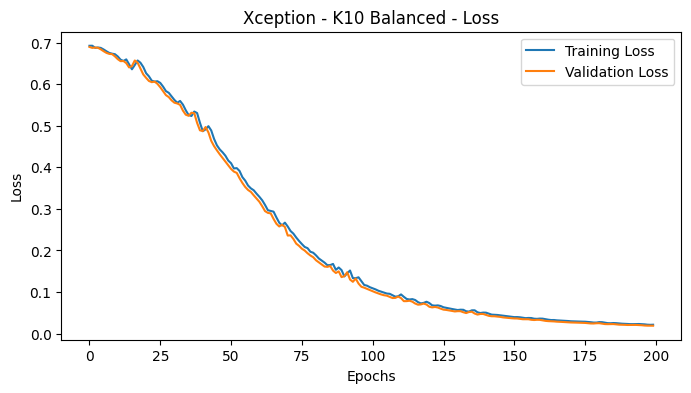

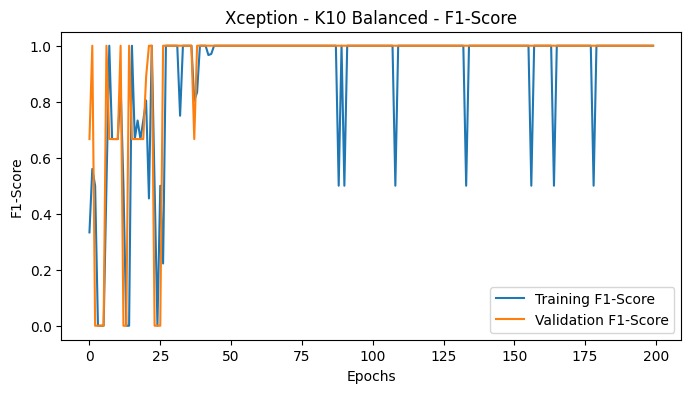

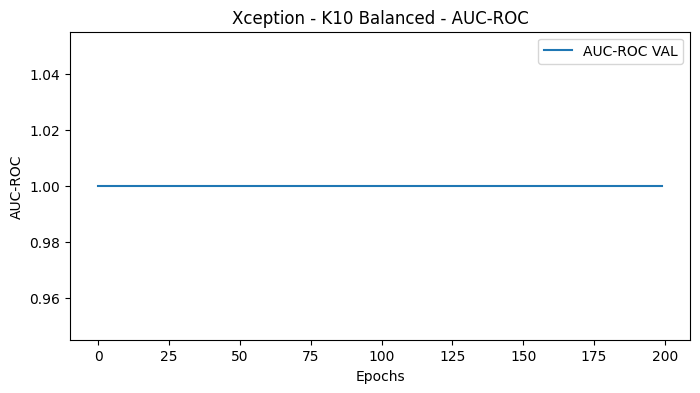

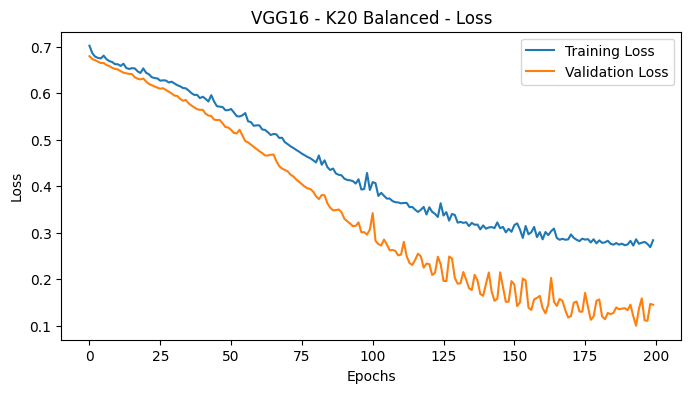

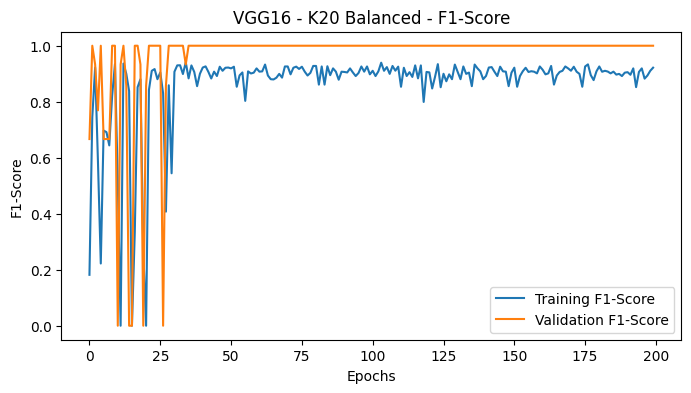

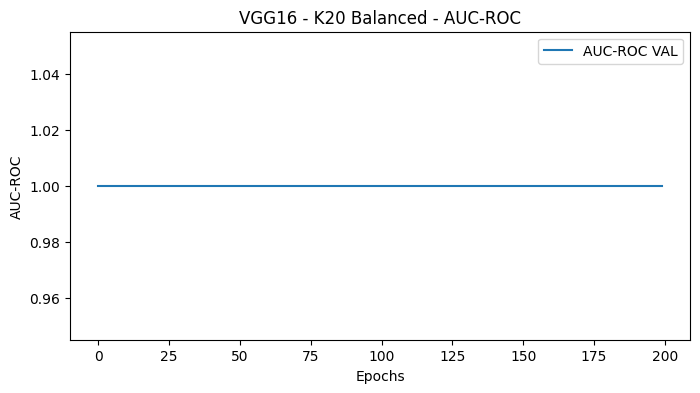

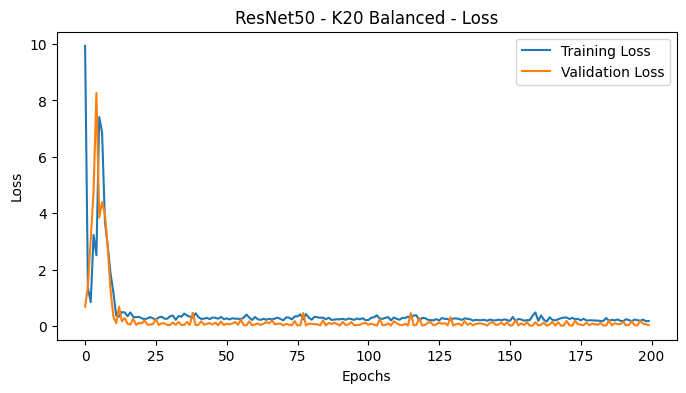

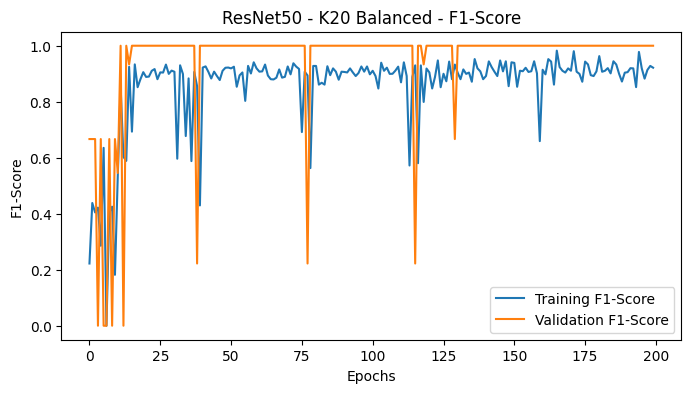

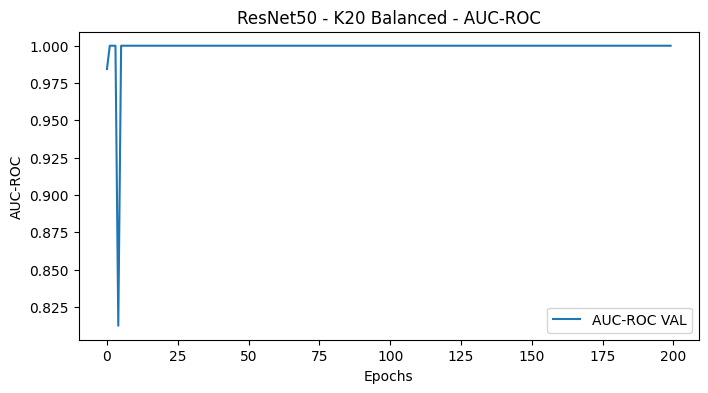

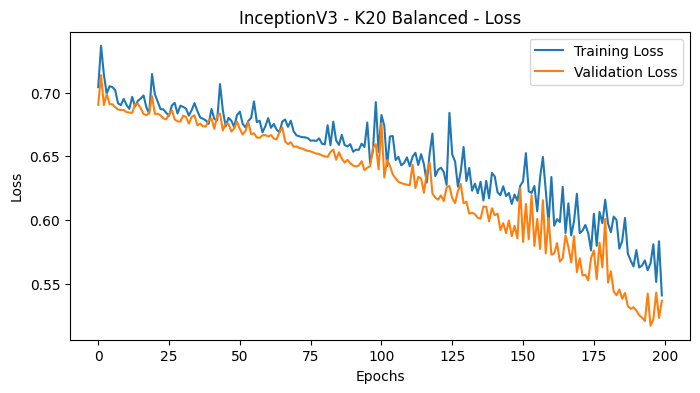

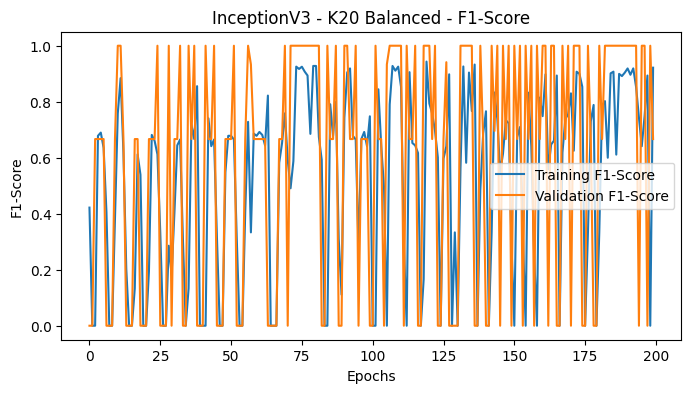

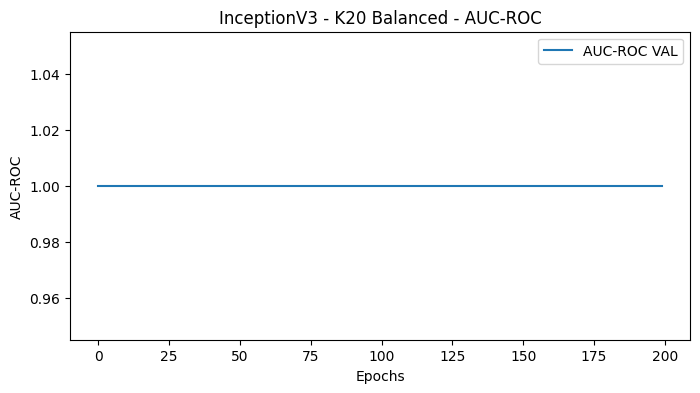

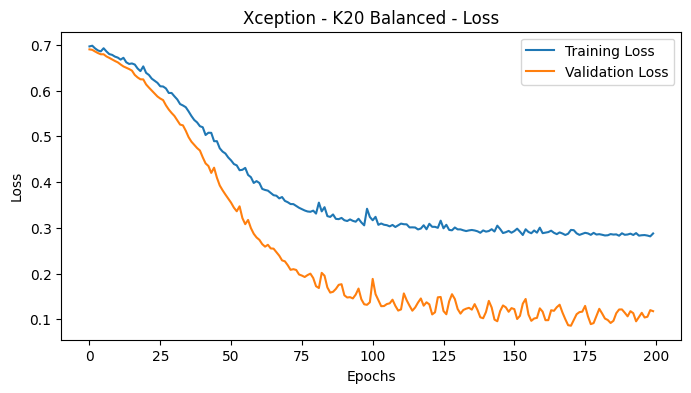

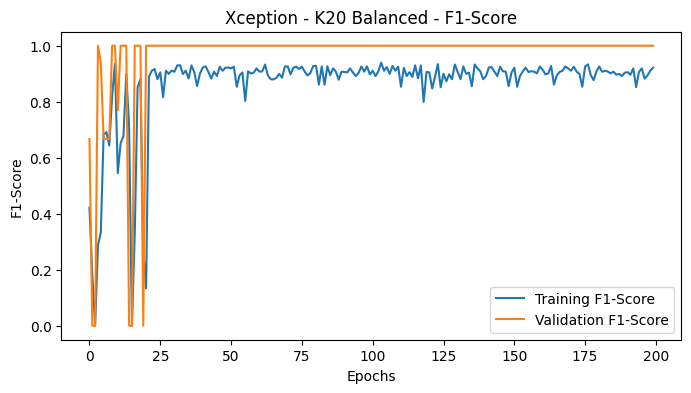

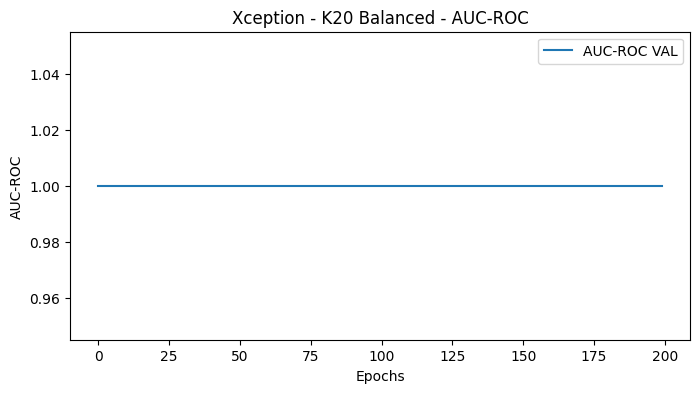

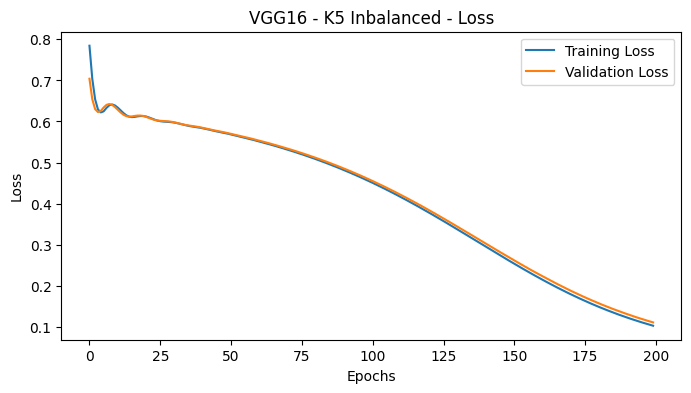

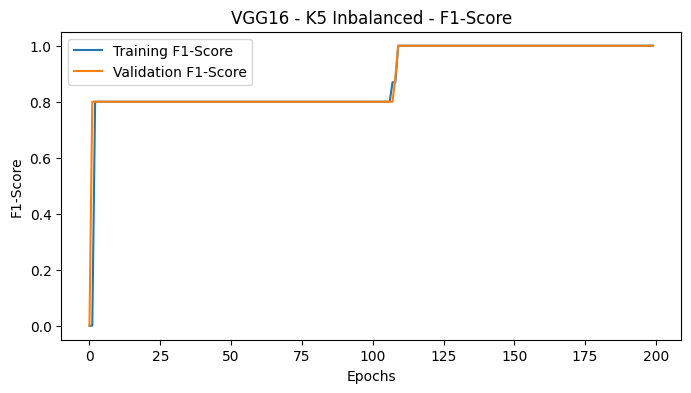

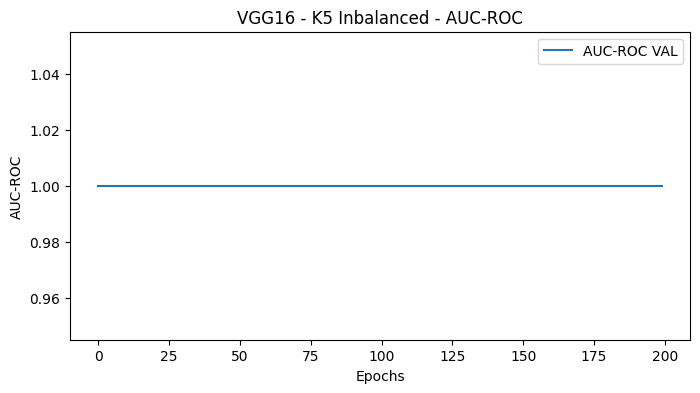

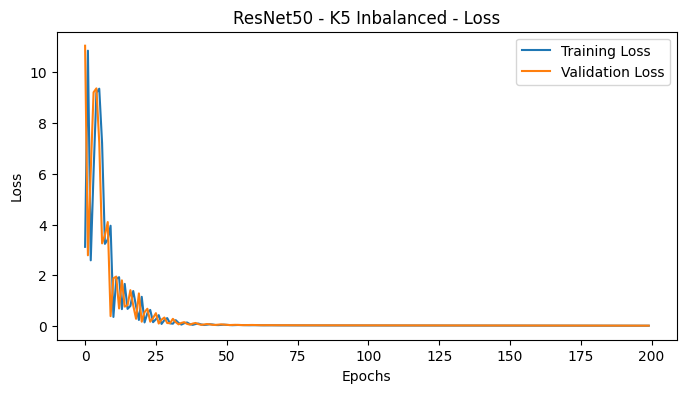

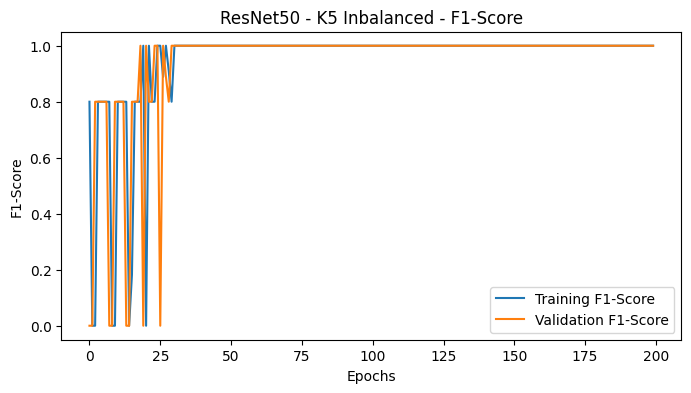

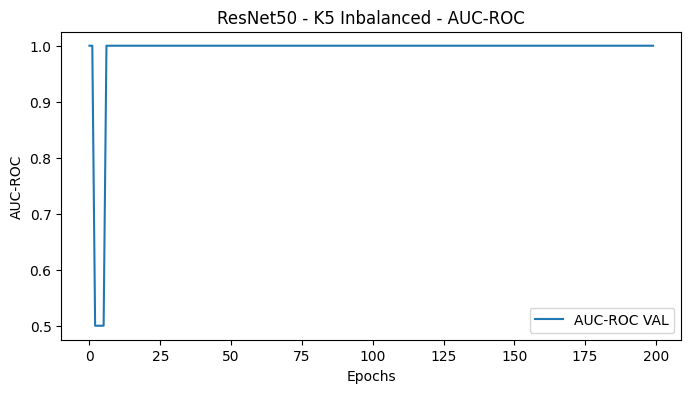

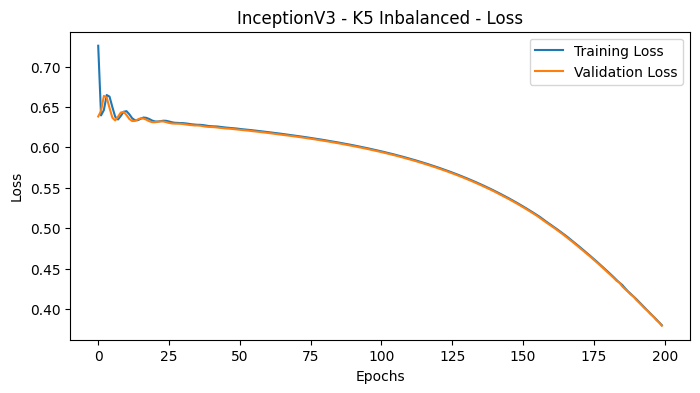

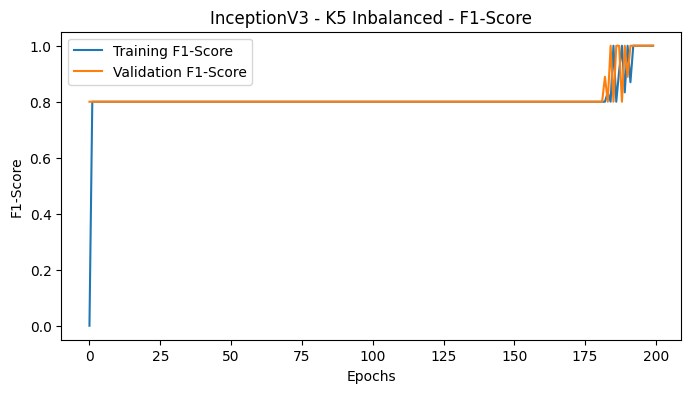

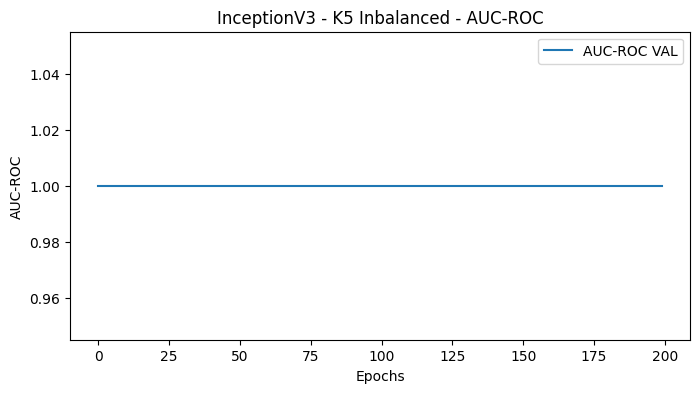

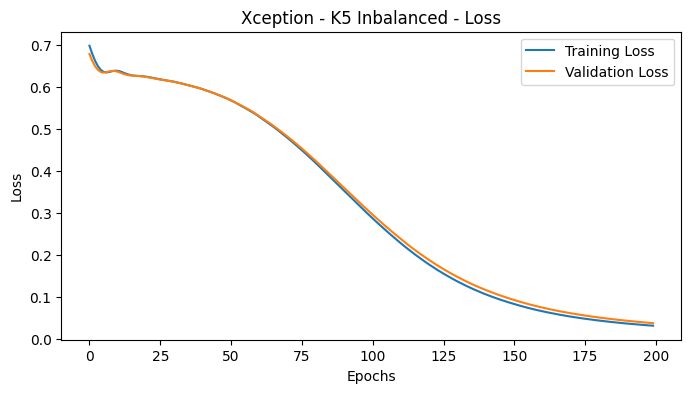

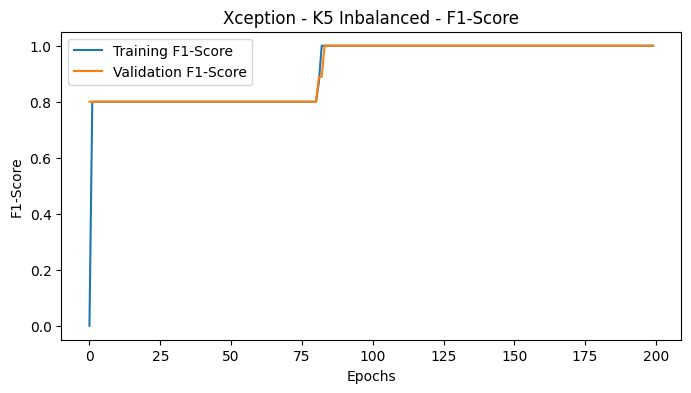

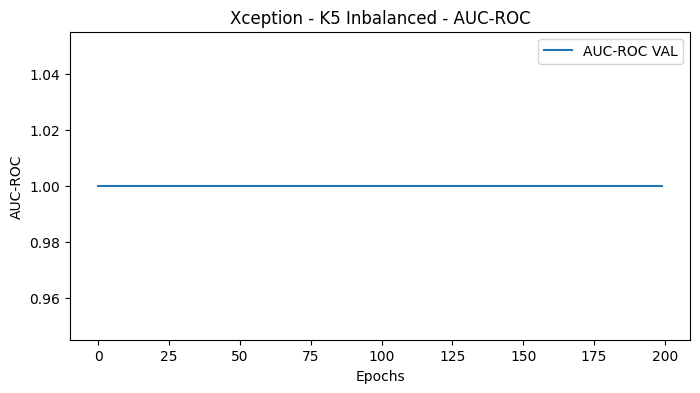

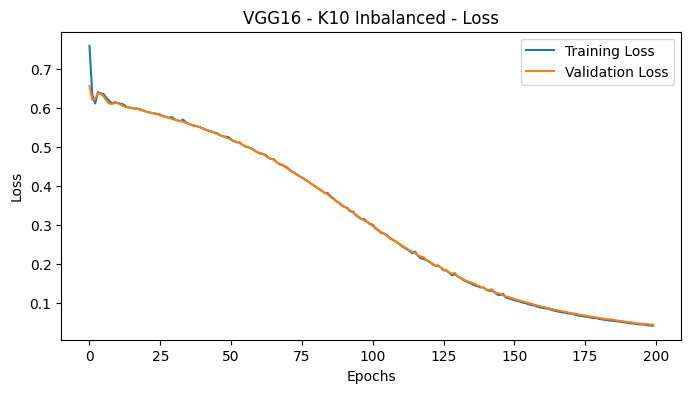

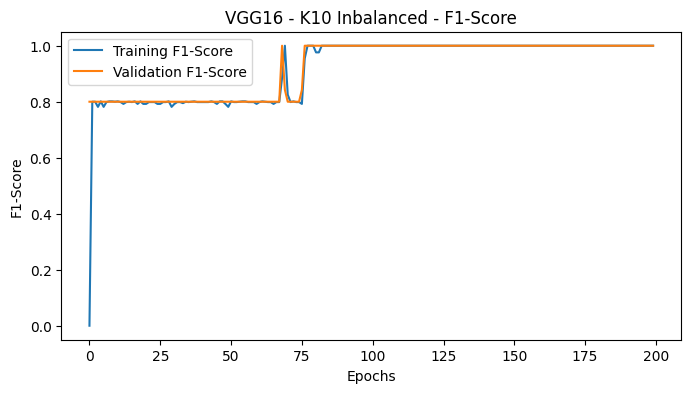

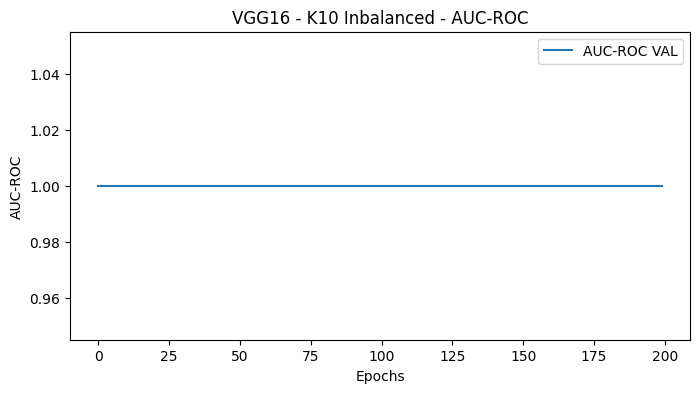

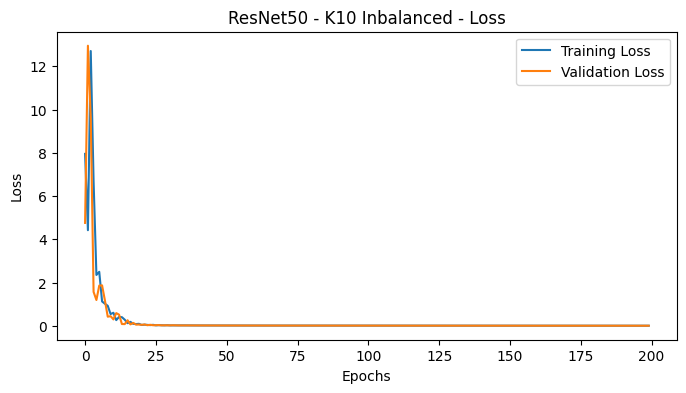

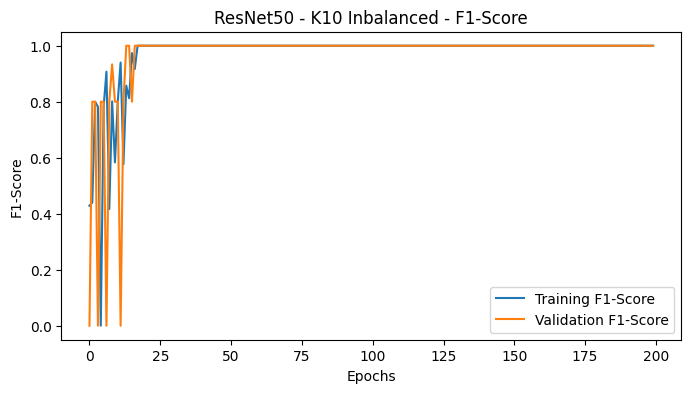

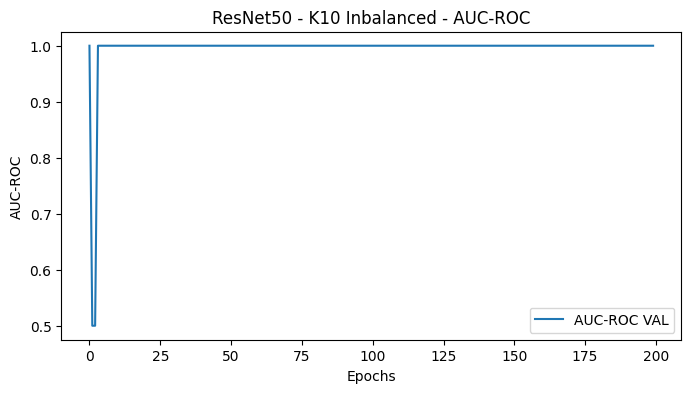

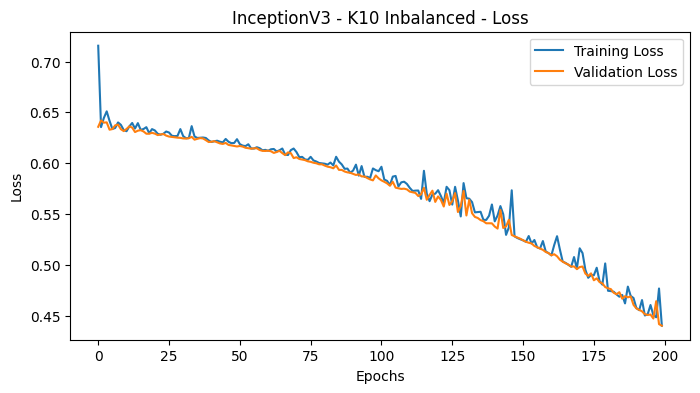

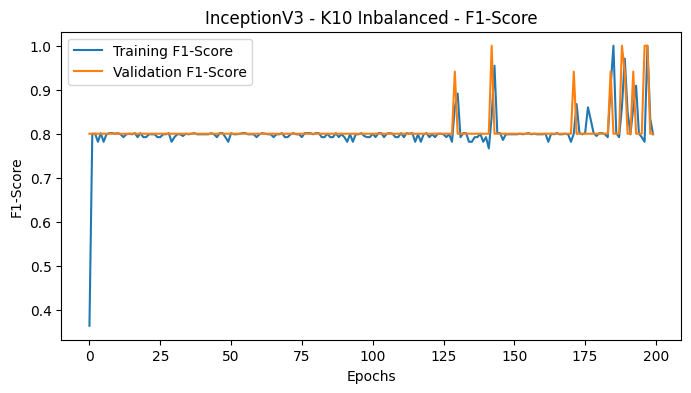

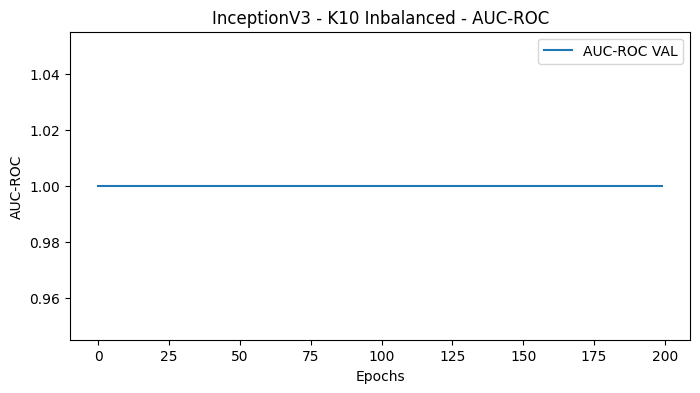

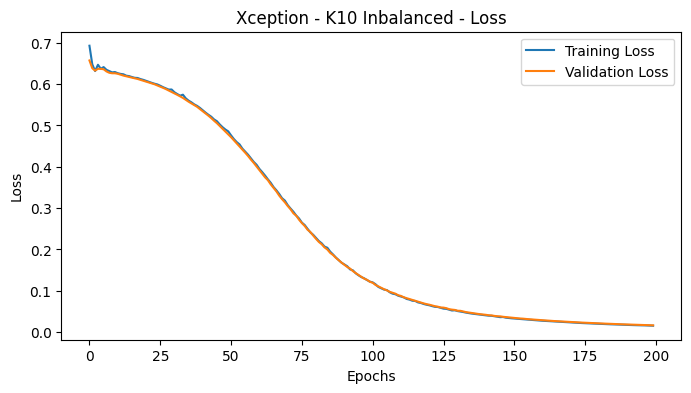

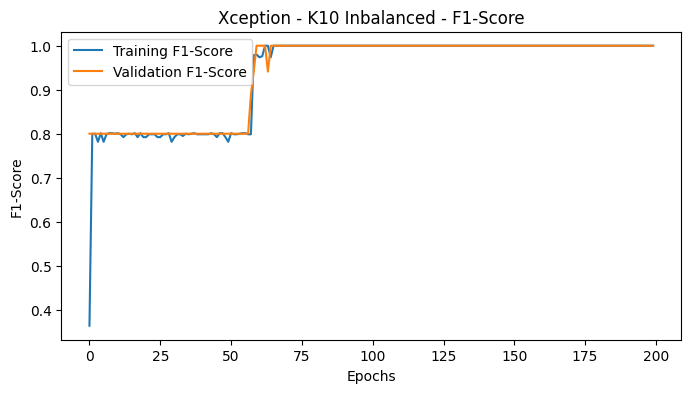

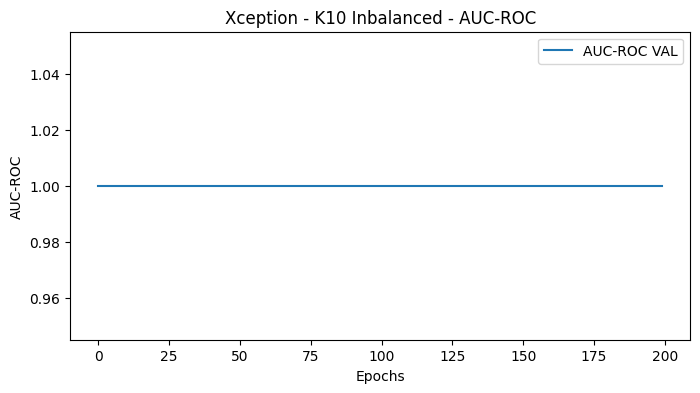

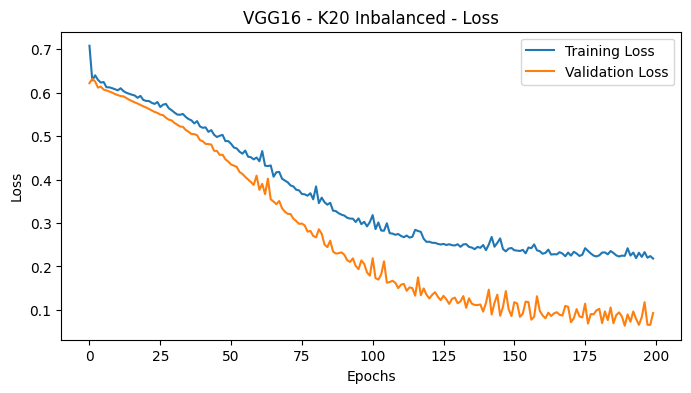

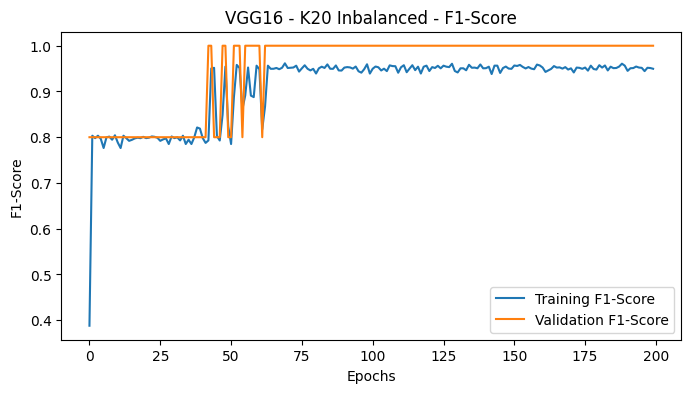

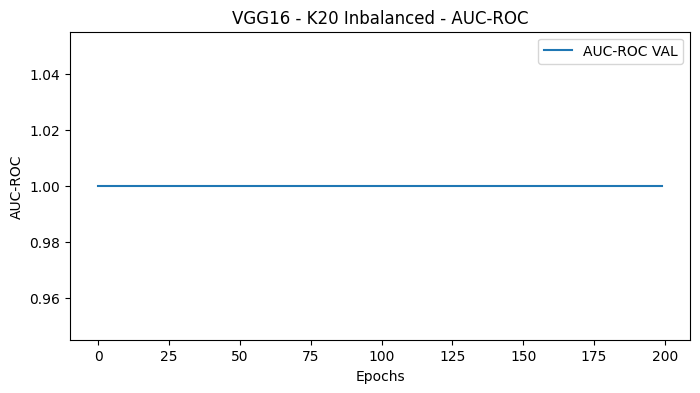

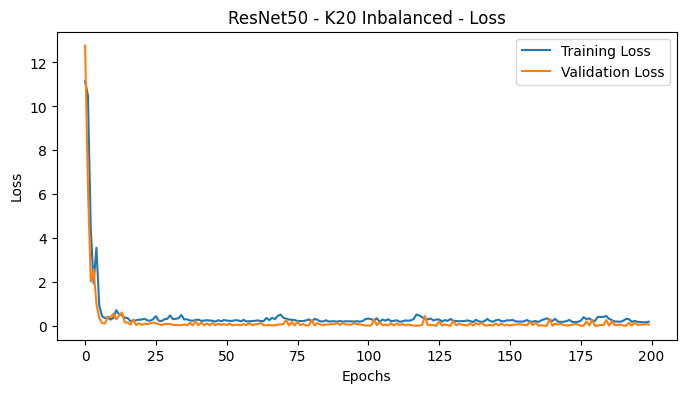

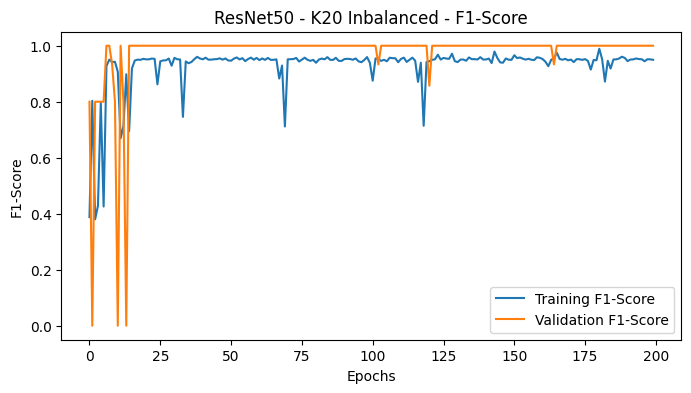

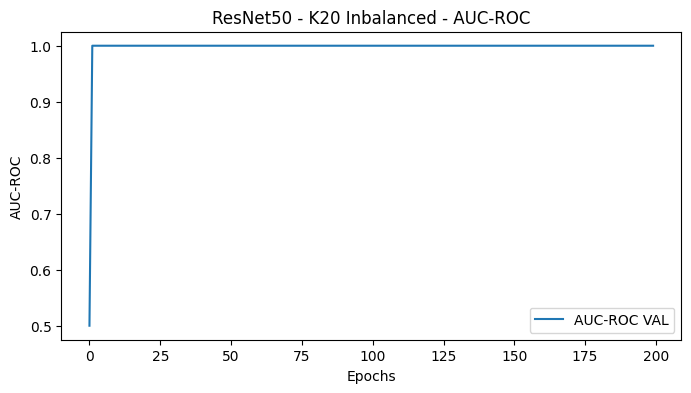

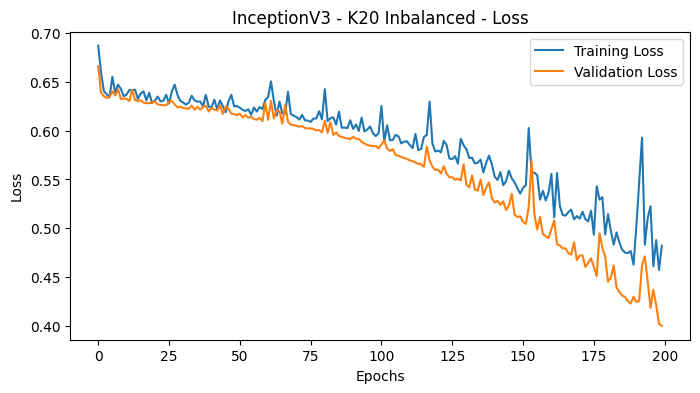

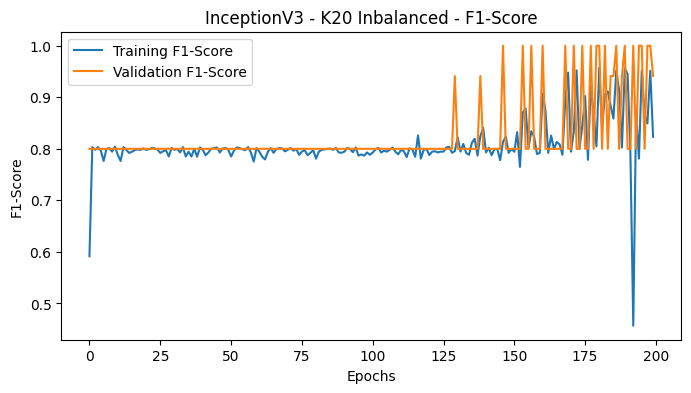

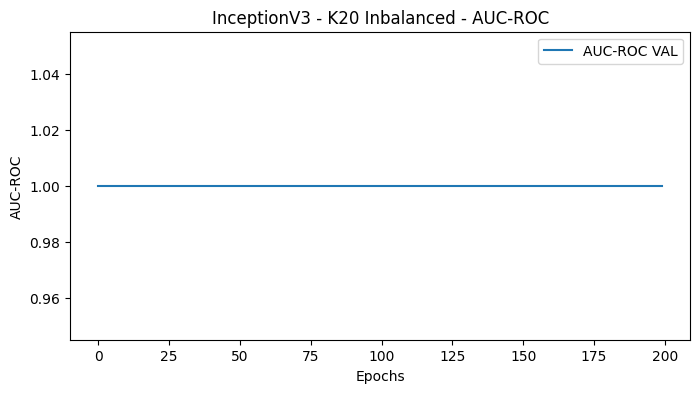

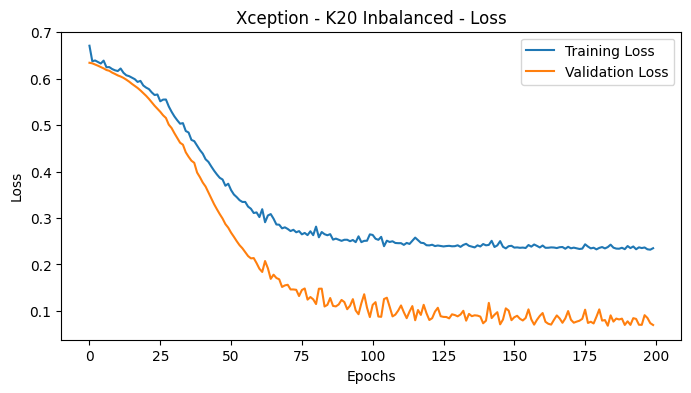

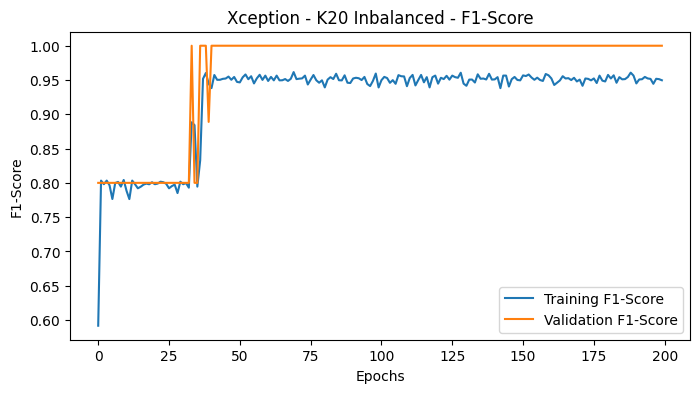

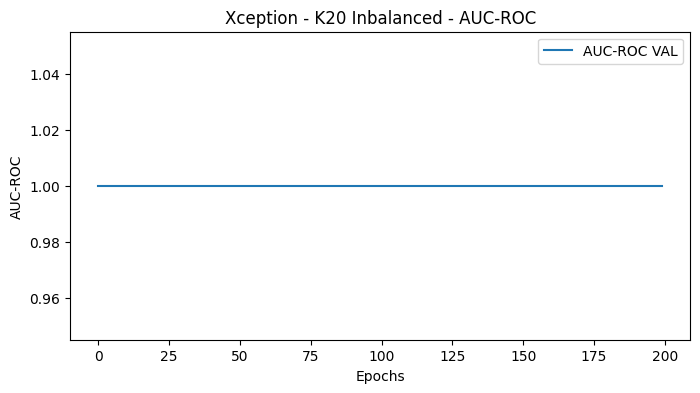

In [ ]:
list_of_shots_allvalues = [df_k5_balanced_allvalues, df_k10_balanced_allvalues, df_k20_balanced_allvalues,
                           df_k5_inbalanced_allvalues, df_k10_inbalanced_allvalues, df_k20_inbalanced_allvalues]

for each in list_of_shots_allvalues:

  for index, row in each.iterrows():
    if each.equals(list_of_shots_allvalues[0]):
      model_name = row['Modelname'] + ' - K5 Balanced'
    if each.equals(list_of_shots_allvalues[1]):
      model_name = row['Modelname'] + ' - K10 Balanced'
    if each.equals(list_of_shots_allvalues[2]):
      model_name = row['Modelname'] + ' - K20 Balanced'
    if each.equals(list_of_shots_allvalues[3]):
      model_name = row['Modelname'] + ' - K5 Inbalanced'
    if each.equals(list_of_shots_allvalues[4]):
      model_name = row['Modelname'] + ' - K10 Inbalanced'
    if each.equals(list_of_shots_allvalues[5]):
      model_name = row['Modelname'] + ' - K20 Inbalanced'

    # Loss
    plt.figure(figsize=(8, 4))
    plt.plot(row['Train Loss'], label='Training Loss')
    plt.plot(row['VAL Loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    plt.show()

    # F1-Score
    plt.figure(figsize=(8, 4))
    plt.plot(row['Train F1-Score'], label='Training F1-Score')
    plt.plot(row['VAL F1-Score'], label='Validation F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.title(f'{model_name} - F1-Score')
    plt.legend()
    plt.show()

    # AUC-ROC
    plt.figure(figsize=(8, 4))
    plt.plot(row['AUC-ROC-VAL'], label='AUC-ROC VAL')
    plt.xlabel('Epochs')
    plt.ylabel('AUC-ROC')
    plt.title(f'{model_name} - AUC-ROC')
    plt.legend()
    plt.show()

# Dataset

In [ ]:
sys.path.append('/content/drive/MyDrive/Applied Analytics/Applied-Analytics_Few-Shot-AD/')

from utils import load_local_dataset

In [ ]:
data_path = base_path + "Applied-Analytics_Few-Shot-AD/data/mechanicalseals"
X, y = load_local_dataset(data_path, encoding="integer")

Dataset loaded: 181 images (shape: (224, 224, 3)), belonging to 2 classes.


In [ ]:
# Preprocessing the images with original preprocess of its models

#List with names of the models
list_of_pre_images_models = ["VGG16", "ResNet50", "InceptionV3", "Xception"]

root_x = copy.copy(X)
root_x1 = copy.copy(X)
root_x2 = copy.copy(X)
root_x3 = copy.copy(X)

#Below are the models copied and preprocessed
X_preprocessed_images_vgg16 = copy.copy(X)
X_preprocessed_images_vgg16_rgb = []

for each1 in root_x:
  preprocessed_image1 = pre_input_vgg16(each1)
  X_preprocessed_images_vgg16_rgb.append(preprocessed_image1)

X_preprocessed_images_resnet50_rgb = []


for each2 in root_x1:
  preprocessed_image2 = pre_input_resnet50(each2)
  X_preprocessed_images_resnet50_rgb.append(preprocessed_image2)

X_preprocessed_images_inceptionv3_rgb = []

for each3 in root_x2:
    if each3.shape[2] == 3:
        # Skaling pixel areas from 0 to 255
        each3 = each3 * 255

        # Wende das Preprocessing an
        preprocessed_image_incep_299 = cv2.resize(each3, (299, 299))
        preprocessed_image3 = pre_input_inception_v3(preprocessed_image_incep_299)

        X_preprocessed_images_inceptionv3_rgb.append(preprocessed_image3)
    else:
        print("Error")


X_preprocessed_images_xception_rgb = []
for each4 in root_x3:
    if each4.shape[2] == 3:
        # Skaling pixel areas from 0 to 255
        each4 = each4 * 255

        # Wende das Preprocessing an
        preprocessed_image_xcep_299 = cv2.resize(each4, (299, 299))
        preprocessed_image4 = pre_input_xception(preprocessed_image_xcep_299)

        X_preprocessed_images_xception_rgb.append(preprocessed_image4)
    else:
        print("Error")

#Creating splitted lists for X and y for each model because of its different preprocess method
X_undamaged_vgg16 = []
y_undamaged_vgg16 = []
X_damaged_vgg16 = []
y_damaged_vgg16 = []

X_undamaged_resnet50 = []
y_undamaged_resnet50 = []
X_damaged_resnet50 = []
y_damaged_resnet50 = []

X_undamaged_inceptionv3= []
y_undamaged_inceptionv3 = []
X_damaged_inceptionv3 = []
y_damaged_inceptionv3 = []

X_undamaged_xception = []
y_undamaged_xception = []
X_damaged_xception = []
y_damaged_xception = []

#Taking all data of X and y and iterating with for-clause to get the right split of undamaged and damaged
sample_count = 0


for element in X:
  #print(y[sample_count])
  #print(X[sample_count])

  if y[sample_count] == 1:
    X_damaged_vgg16.append(X_preprocessed_images_vgg16_rgb[sample_count])
    y_damaged_vgg16.append(y[sample_count])

    X_damaged_resnet50.append(X_preprocessed_images_resnet50_rgb[sample_count])
    y_damaged_resnet50.append(y[sample_count])

    X_damaged_inceptionv3.append(X_preprocessed_images_inceptionv3_rgb[sample_count])
    y_damaged_inceptionv3.append(y[sample_count])

    X_damaged_xception.append(X_preprocessed_images_xception_rgb[sample_count])
    y_damaged_xception.append(y[sample_count])

  elif y[sample_count] == 0:
    X_undamaged_vgg16.append(X_preprocessed_images_vgg16_rgb[sample_count])
    y_undamaged_vgg16.append(y[sample_count])

    X_undamaged_resnet50.append(X_preprocessed_images_resnet50_rgb[sample_count])
    y_undamaged_resnet50.append(y[sample_count])

    X_undamaged_inceptionv3.append(X_preprocessed_images_inceptionv3_rgb[sample_count])
    y_undamaged_inceptionv3.append(y[sample_count])

    X_undamaged_xception.append(X_preprocessed_images_xception_rgb[sample_count])
    y_undamaged_xception.append(y[sample_count])

  sample_count+=1

print("The amount of undamaged images are: " + str(len(X_undamaged_vgg16)) + " inclusive the same number of labels:  " + str(len(y_undamaged_vgg16)))
print("The amount of damaged images are: " + str(len(X_damaged_vgg16)) + " inclusive the same number of labels: " + str(len(y_damaged_vgg16)))


# Balanced Test
#VGG16
normal_test_data_balanced_vgg16 = np.array(X_undamaged_vgg16[63:93])
anomaly_test_data_balanced_vgg16 = np.array(X_damaged_vgg16[58:88])

test_data_balanced_vgg16 = np.concatenate((normal_test_data_balanced_vgg16, anomaly_test_data_balanced_vgg16), axis=0)
test_labels_balanced_vgg16 = np.concatenate((np.zeros(len(normal_test_data_balanced_vgg16)), np.ones(len(anomaly_test_data_balanced_vgg16))))

#ResNet50
normal_test_data_balanced_resnet50 = np.array(X_undamaged_resnet50[63:93])
anomaly_test_data_balanced_resnet50 = np.array(X_damaged_resnet50[58:88])

test_data_balanced_resnet50 = np.concatenate((normal_test_data_balanced_resnet50, anomaly_test_data_balanced_resnet50), axis=0)
test_labels_balanced_resnet50 = np.concatenate((np.zeros(len(normal_test_data_balanced_resnet50)), np.ones(len(anomaly_test_data_balanced_resnet50))))

#InceptionV3
normal_test_data_balanced_inceptionv3 = np.array(X_undamaged_inceptionv3[63:93])
anomaly_test_data_balanced_inceptionv3 = np.array(X_damaged_inceptionv3[58:88])

test_data_balanced_inceptionv3 = np.concatenate((normal_test_data_balanced_inceptionv3, anomaly_test_data_balanced_inceptionv3), axis=0)
test_labels_balanced_inceptionv3 = np.concatenate((np.zeros(len(normal_test_data_balanced_inceptionv3)), np.ones(len(anomaly_test_data_balanced_inceptionv3))))

#Xception
normal_test_data_balanced_xception = np.array(X_undamaged_xception[63:93])
anomaly_test_data_balanced_xception = np.array(X_damaged_xception[58:88])

test_data_balanced_xception = np.concatenate((normal_test_data_balanced_xception, anomaly_test_data_balanced_xception), axis=0)
test_labels_balanced_xception = np.concatenate((np.zeros(len(normal_test_data_balanced_xception)), np.ones(len(anomaly_test_data_balanced_xception))))

# Inbalanced Test
#VGG16
normal_test_data_inbalanced_vgg16 = np.array(X_undamaged_vgg16[73:93])
anomaly_test_data_inbalanced_vgg16 = np.array(X_damaged_vgg16[48:88])

test_data_inbalanced_vgg16 = np.concatenate((normal_test_data_inbalanced_vgg16, anomaly_test_data_inbalanced_vgg16), axis=0)
test_labels_inbalanced_vgg16 = np.concatenate((np.zeros(len(normal_test_data_inbalanced_vgg16)), np.ones(len(anomaly_test_data_inbalanced_vgg16))))

#ResNet50
normal_test_data_inbalanced_resnet50 = np.array(X_undamaged_resnet50[73:93])
anomaly_test_data_inbalanced_resnet50 = np.array(X_damaged_resnet50[48:88])

test_data_inbalanced_resnet50 = np.concatenate((normal_test_data_inbalanced_resnet50, anomaly_test_data_inbalanced_resnet50), axis=0)
test_labels_inbalanced_resnet50 = np.concatenate((np.zeros(len(normal_test_data_inbalanced_resnet50)), np.ones(len(anomaly_test_data_inbalanced_resnet50))))

#InceptionV3
normal_test_data_inbalanced_inceptionv3 = np.array(X_undamaged_inceptionv3[73:93])
anomaly_test_data_inbalanced_inceptionv3 = np.array(X_damaged_inceptionv3[48:88])

test_data_inbalanced_inceptionv3 = np.concatenate((normal_test_data_inbalanced_inceptionv3, anomaly_test_data_inbalanced_inceptionv3), axis=0)
test_labels_inbalanced_inceptionv3 = np.concatenate((np.zeros(len(normal_test_data_inbalanced_inceptionv3)), np.ones(len(anomaly_test_data_inbalanced_inceptionv3))))

#Xception
normal_test_data_inbalanced_xception = np.array(X_undamaged_xception[73:93])
anomaly_test_data_inbalanced_xception = np.array(X_damaged_xception[48:88])

test_data_inbalanced_xception = np.concatenate((normal_test_data_inbalanced_xception, anomaly_test_data_inbalanced_xception), axis=0)
test_labels_inbalanced_xception = np.concatenate((np.zeros(len(normal_test_data_inbalanced_xception)), np.ones(len(anomaly_test_data_inbalanced_xception))))


The amount of undamaged images are: 93 inclusive the same number of labels:  93
The amount of damaged images are: 88 inclusive the same number of labels: 88


# Trained Models

In [ ]:
def balanced_accuracy(y_true, y_pred):
    return balanced_accuracy_score(y_true, y_pred)



def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from tensorflow.keras.callbacks import Callback

class AUCROCCallback(Callback):
    def __init__(self, validation_data):
        super(AUCROCCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = self.model.predict(x_val)
        auc_roc = roc_auc_score(y_val, y_pred)
        logs['val_auc_roc'] = auc_roc

In [ ]:
# Loading Balance Models
model_k5_vgg16_balanced = keras.models.load_model(base_path + "Balanced/K5 Balanced/Model_k5_VGG16_2023-06-17_13-18-07.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_resnet50_balanced = keras.models.load_model(base_path + "Balanced/K5 Balanced/Model_k5_ResNet50_2023-06-17_13-18-07.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_inceptionv3_balanced = keras.models.load_model(base_path + "Balanced/K5 Balanced/Model_k5_InceptionV3_2023-06-17_13-18-07.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_xception_balanced = keras.models.load_model(base_path + "Balanced/K5 Balanced/Model_k5_Xception_2023-06-17_13-18-07.h5",
                                custom_objects={"f1_m": f1_m})

model_k10_vgg16_balanced = keras.models.load_model(base_path + "Balanced/K10 Balanced/Model_k10_VGG16_2023-06-17_13-25-27.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_resnet50_balanced = keras.models.load_model(base_path + "Balanced/K10 Balanced/Model_k10_ResNet50_2023-06-17_13-25-27.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_inceptionv3_balanced = keras.models.load_model(base_path + "Balanced/K10 Balanced/Model_k10_InceptionV3_2023-06-17_13-25-27.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_xception_balanced = keras.models.load_model(base_path + "Balanced/K10 Balanced/Model_k10_Xception_2023-06-17_13-25-27.h5",
                                custom_objects={"f1_m": f1_m})

model_k20_vgg16_balanced = keras.models.load_model(base_path + "Balanced/K20 Balanced/Model_k20_VGG16_2023-06-17_13-42-46.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_resnet50_balanced = keras.models.load_model(base_path + "Balanced/K20 Balanced/Model_k20_ResNet50_2023-06-17_13-42-46.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_inceptionv3_balanced = keras.models.load_model(base_path + "Balanced/K20 Balanced/Model_K20_InceptionV3_2023-06-17_13-42-46.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_xception_balanced = keras.models.load_model(base_path + "Balanced/K20 Balanced/Model_k20_Xception_2023-06-17_13-42-46.h5",
                                custom_objects={"f1_m": f1_m})

# Inbalance Models
model_k5_vgg16_inbalanced = keras.models.load_model(base_path + "Inbalanced/K5 Inbalanced/Model_k5_VGG16_2023-06-17_14-25-12.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_resnet50_inbalanced = keras.models.load_model(base_path + "Inbalanced/K5 Inbalanced/Model_k5_ResNet50_2023-06-17_14-25-12.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_inceptionv3_inbalanced = keras.models.load_model(base_path + "Inbalanced/K5 Inbalanced/Model_k5_InceptionV3_2023-06-17_14-25-12.h5",
                                custom_objects={"f1_m": f1_m})
model_k5_xception_inbalanced = keras.models.load_model(base_path + "Inbalanced/K5 Inbalanced/Model_k5_Xception_2023-06-17_14-25-12.h5",
                                custom_objects={"f1_m": f1_m})

model_k10_vgg16_inbalanced = keras.models.load_model(base_path + "Inbalanced/K10 Inbalanced/Model_k10_VGG16_2023-06-17_14-51-03.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_resnet50_inbalanced = keras.models.load_model(base_path + "Inbalanced/K10 Inbalanced/Model_k10_ResNet50_2023-06-17_14-51-03.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_inceptionv3_inbalanced = keras.models.load_model(base_path + "Inbalanced/K10 Inbalanced/Model_k10_InceptionV3_2023-06-17_14-51-03.h5",
                                custom_objects={"f1_m": f1_m})
model_k10_xception_inbalanced = keras.models.load_model(base_path + "Inbalanced/K10 Inbalanced/Model_k10_Xception_2023-06-17_14-51-03.h5",
                                custom_objects={"f1_m": f1_m})

model_k20_vgg16_inbalanced = keras.models.load_model(base_path + "Inbalanced/K20 Inbalanced/Model_k20_VGG16_2023-06-17_15-17-52.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_resnet50_inbalanced = keras.models.load_model(base_path + "Inbalanced/K20 Inbalanced/Model_k20_ResNet50_2023-06-17_15-17-52.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_inceptionv3_inbalanced = keras.models.load_model(base_path + "Inbalanced/K20 Inbalanced/Model_K20_InceptionV3_2023-06-17_15-17-52.h5",
                                custom_objects={"f1_m": f1_m})
model_k20_xception_inbalanced = keras.models.load_model(base_path + "Inbalanced/K20 Inbalanced/Model_k20_Xception_2023-06-17_15-17-52.h5",
                                custom_objects={"f1_m": f1_m})


In [ ]:
#Balance
balance_model_list_vgg16 = [model_k5_vgg16_balanced, model_k10_vgg16_balanced, model_k20_vgg16_balanced]

balance_model_list_resnet50= [model_k5_resnet50_balanced, model_k10_resnet50_balanced, model_k20_resnet50_balanced]

balance_model_list_inceptionv3 = [model_k5_inceptionv3_balanced, model_k10_inceptionv3_balanced, model_k20_inceptionv3_balanced]

balance_model_list_xception = [model_k5_xception_balanced, model_k10_xception_balanced, model_k20_xception_balanced]

#Inbalance
inbalance_model_list_vgg16 = [model_k5_vgg16_inbalanced, model_k10_vgg16_inbalanced, model_k20_vgg16_inbalanced]

inbalance_model_list_resnet50= [model_k5_resnet50_inbalanced, model_k10_resnet50_inbalanced, model_k20_resnet50_inbalanced]

inbalance_model_list_inceptionv3 = [model_k5_inceptionv3_inbalanced, model_k10_inceptionv3_inbalanced, model_k20_inceptionv3_inbalanced]

inbalance_model_list_xception = [model_k5_xception_inbalanced, model_k10_xception_inbalanced, model_k20_xception_inbalanced]

balance_models = [balance_model_list_vgg16, balance_model_list_resnet50, balance_model_list_inceptionv3, balance_model_list_xception]
inbalance_models = [inbalance_model_list_vgg16, inbalance_model_list_resnet50, inbalance_model_list_inceptionv3, inbalance_model_list_xception]

test_data_balanced = [test_data_balanced_vgg16, test_data_balanced_resnet50, test_data_balanced_inceptionv3, test_data_balanced_xception]
test_labels_balanced = [test_labels_balanced_vgg16, test_labels_balanced_resnet50, test_labels_balanced_inceptionv3, test_labels_balanced_xception]

test_data_inbalanced = [test_data_inbalanced_vgg16, test_data_inbalanced_resnet50, test_data_inbalanced_inceptionv3, test_data_inbalanced_xception]
test_labels_inbalanced = [test_labels_inbalanced_vgg16, test_labels_inbalanced_resnet50, test_labels_inbalanced_inceptionv3, test_labels_inbalanced_xception]


In [ ]:
k_values_list = [5, 10, 20]

for i in range(len(balance_models)):
    model_list = balance_models[i]
    model_names = ["VGG16", "ResNet50", "InceptionV3", "Xception"]
    test_data = test_data_balanced[i]
    test_labels = test_labels_balanced[i]

    for j, (model, k_values) in enumerate(zip(model_list, k_values_list)):
        y_pred = model.predict(test_data)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(test_labels, y_pred_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix of ' + model_names[i] + ' - Balanced - (k' + str(k_values) + ')')
        plt.show()


In [ ]:
k_values_list = [5, 10, 20]

for i in range(len(inbalance_models)):
    model_list = inbalance_models[i]
    model_names = ["VGG16", "ResNet50", "InceptionV3", "Xception"]
    test_data = test_data_inbalanced[i]
    test_labels = test_labels_inbalanced[i]

    for j, (model, k_values) in enumerate(zip(model_list, k_values_list)):
        y_pred = model.predict(test_data)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(test_labels, y_pred_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix of ' + model_names[i] + ' - Inbalanced - (k' + str(k_values) + ')')
        plt.show()


In [ ]:
k_values_list = [5, 10, 20]

for i in range(len(balance_models)):
    model_list = balance_models[i]
    model_names = ["VGG16", "ResNet50", "InceptionV3", "Xception"]
    test_data = test_data_balanced[i]
    test_labels = test_labels_balanced[i]

    for j, (model, k_values) in enumerate(zip(model_list, k_values_list)):
      y_pred = model.predict(test_data)
      y_pred_classes = (y_pred > 0.90).astype(int)
      balanced_acc = balanced_accuracy_score(test_labels, y_pred_classes)
      print("Balanced Accuracy " + str(balanced_acc) + " of " + model_names[i]  + "- Balanced" + ' - (k' + str(k_values) + ')')

2/2 [==============================] - 48s 22s/step
Balanced Accuracy 0.9666666666666667 of VGG16- Balanced - (k5)
2/2 [==============================] - 37s 17s/step
Balanced Accuracy 0.9666666666666667 of VGG16- Balanced - (k10)
2/2 [==============================] - 40s 18s/step
Balanced Accuracy 0.5 of VGG16- Balanced - (k20)
2/2 [==============================] - 12s 6s/step
Balanced Accuracy 0.9666666666666667 of ResNet50- Balanced - (k5)
2/2 [==============================] - 12s 7s/step
Balanced Accuracy 0.9666666666666667 of ResNet50- Balanced - (k10)
2/2 [==============================] - 12s 5s/step
Balanced Accuracy 0.8333333333333333 of ResNet50- Balanced - (k20)
2/2 [==============================] - 15s 8s/step
Balanced Accuracy 0.5 of InceptionV3- Balanced - (k5)
2/2 [==============================] - 16s 6s/step
Balanced Accuracy 0.5 of InceptionV3- Balanced - (k10)
2/2 [==============================] - 15s 8s/step
Balanced Accuracy 0.5 of InceptionV3- Balanced - (k20

In [ ]:
k_values_list = [5, 10, 20]

for i in range(len(inbalance_models)):
    model_list = inbalance_models[i]
    model_names = ["VGG16", "ResNet50", "InceptionV3", "Xception"]
    test_data = test_data_inbalanced[i]
    test_labels = test_labels_inbalanced[i]

    for j, (model, k_values) in enumerate(zip(model_list, k_values_list)):
      y_pred = model.predict(test_data)
      y_pred_classes = (y_pred > 0.90).astype(int)
      balanced_acc = balanced_accuracy_score(test_labels, y_pred_classes)
      print("Balanced Accuracy " + str(balanced_acc) + " of " + model_names[i]  + " - Inbalanced" + ' - (k' + str(k_values) + ')')

2/2 [==============================] - 39s 17s/step
Balanced Accuracy 0.95 of VGG16 - Inbalanced - (k5)
2/2 [==============================] - 36s 17s/step
Balanced Accuracy 0.95 of VGG16 - Inbalanced - (k10)
2/2 [==============================] - 36s 17s/step
Balanced Accuracy 0.5375 of VGG16 - Inbalanced - (k20)
2/2 [==============================] - 12s 5s/step
Balanced Accuracy 0.95 of ResNet50 - Inbalanced - (k5)
2/2 [==============================] - 12s 7s/step
Balanced Accuracy 0.95 of ResNet50 - Inbalanced - (k10)
2/2 [==============================] - 12s 5s/step
Balanced Accuracy 0.8625 of ResNet50 - Inbalanced - (k20)
2/2 [==============================] - 15s 6s/step
Balanced Accuracy 0.5 of InceptionV3 - Inbalanced - (k5)
2/2 [==============================] - 15s 8s/step
Balanced Accuracy 0.5 of InceptionV3 - Inbalanced - (k10)
2/2 [==============================] - 15s 6s/step
Balanced Accuracy 0.5 of InceptionV3 - Inbalanced - (k20)
2/2 [==============================]